In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as po

df_18 = pd.read_csv('../csv/memberships_2018.csv')
df_17 = pd.read_csv('../csv/memberships_2017.csv')


#Drop Columns
columns_to_remove = ['id', 'user_id', 'type','record_id','notes','gco_order_number','paypal_order_number', 'status', 
                     'updated_at', 'state', 'parent_id', 'credits_remaining', 'credits_pregrant', 'burn_user_id',
                     'free_trial', 'refund_date', 'processor_em', 'admin_granted', 'turbo_traffic_optimize_em', 'pricing_table_em']


In [3]:
print('Monthly Count 2018: ' + str(round(df_18.amount[df_18.subscription_term_length == 1].count())))
print('Annual Count 2018: ' + str(round(df_18.amount[df_18.subscription_term_length == 12].count())))

print('Monthly Count 2017: ' + str(round(df_17.amount[df_17.subscription_term_length == 1].count())))
print('Annual Count 2017: ' + str(round(df_17.amount[df_17.subscription_term_length == 12].count())))

print('State Refunded 2018: ' + str(round(df_18.amount[df_18.state == 'refunded'].count())))
print('State Refunded 2017: ' + str(round(df_17.amount[df_17.state == 'refunded'].count())))

print('Admin Granted 2018: ' + str(round(df_18.amount[df_18.admin_granted == True].count())))
print('Admin Granted 2017: ' + str(round(df_17.amount[df_17.admin_granted == True].count())))

print('Is First Payment 2018: ' + str(round(df_18.amount[df_18.is_first_payment == True].count())))
print('Is First Payment 2017: ' + str(round(df_17.amount[df_17.is_first_payment == True].count())))

Monthly Count 2018: 21169
Annual Count 2018: 1952
Monthly Count 2017: 26138
Annual Count 2017: 2086
State Refunded 2018: 1299
State Refunded 2017: 1758
Admin Granted 2018: 650
Admin Granted 2017: 492
Is First Payment 2018: 9034
Is First Payment 2017: 11819


In [34]:
df_18 = df_18[df_18['state'] == 'complete']
df_18 = df_18[df_18['admin_granted'] != True]
#df_18 = df_18[df_18['is_first_payment'] == True]
df_18['paid_date'] = pd.to_datetime(df_18.paid_date,infer_datetime_format=True)
df_18_jan_may = df_18[df_18.paid_date < '2018-06-01']

df_17 = df_17[df_17['state'] == 'complete']
df_17 = df_17[df_17['admin_granted'] != True]
#df_17 = df_17[df_17['is_first_payment'] == True]
df_17['paid_date'] = pd.to_datetime(df_17.paid_date,infer_datetime_format=True)
df_17_jan_may = df_17[df_17.paid_date < '2017-06-01']

df_18.drop(columns_to_remove, axis=1, inplace=True)
df_17.drop(columns_to_remove, axis=1, inplace=True)



In [5]:
sum_with_sale_2018 = round(df_18.amount[df_18.subscription_term_length == 1].sum())
sum_with_sale_2017 = round(df_17.amount[df_17.subscription_term_length == 1].sum())
print('Annual GMV Average 2018 (with Sale): ' + str(round(df_18.amount[df_18.subscription_term_length == 1].sum())))
print('Annual GMV Average 2017 (with Sale): ' + str(round(df_17.amount[df_17.subscription_term_length == 1].sum())))
sum_without_sale_2018 = round(12*(df_18_jan_may.amount[df_18_jan_may.subscription_term_length == 1].sum()/5))
sum_without_sale_2017 = round(12*(df_17_jan_may.amount[df_17_jan_may.subscription_term_length == 1].sum()/5))
print('Annual GMV Average 2018 (without Sale): ' + str(round(12*(df_18_jan_may.amount[df_18_jan_may.subscription_term_length == 1].sum()/5))))
print('Annual GMV Average 2017 (without Sale): ' + str(round(12*(df_17_jan_may.amount[df_17_jan_may.subscription_term_length == 1].sum()/5))))

print('Difference 2018 :' + str(sum_with_sale_2018 - sum_without_sale_2018))
print('Difference 2017 :' + str(sum_with_sale_2017 - sum_without_sale_2017))

Annual GMV Average 2018 (with Sale): 1064260.0
Annual GMV Average 2017 (with Sale): 1249156.0
Annual GMV Average 2018 (without Sale): 1114484.0
Annual GMV Average 2017 (without Sale): 1216088.0
Difference 2018 :-50224.0
Difference 2017 :33068.0


In [6]:
annual_18 = df_18.loc[df_18.subscription_term_length == 12]
annual_count_18 = annual_18.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']
annual_sum_18 = annual_18.set_index('paid_date').groupby(pd.Grouper(freq='M')).sum().reset_index()['amount']
monthly_18 = df_18.loc[df_18.subscription_term_length == 1]
monthly_count_18= monthly_18.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']
monthly_sum_18= monthly_18.set_index('paid_date').groupby(pd.Grouper(freq='M')).sum().reset_index()['amount']


In [7]:
annual_17 = df_17.loc[df_17.subscription_term_length == 12]
annual_count_17 = annual_17.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']
annual_sum_17 = annual_17.set_index('paid_date').groupby(pd.Grouper(freq='M')).sum().reset_index()['amount']
monthly_17 = df_17.loc[df_17.subscription_term_length == 1]
monthly_count_17= monthly_17.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']
monthly_sum_17= monthly_17.set_index('paid_date').groupby(pd.Grouper(freq='M')).sum().reset_index()['amount']

In [8]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

trace0 = go.Scatter(
    x = month,
    y = monthly_sum_18,
    name = '2018 Monthly Sum',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1)
)
trace1 = go.Scatter(
    x = month,
    y = annual_sum_18,
    name = '2018 Annual Sum',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = go.Scatter(
    x = month,
    y = monthly_sum_17,
    name = '2017 Monthly Sum',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1,
        dash = 'dot')
)
trace3 = go.Scatter(
    x = month,
    y = annual_sum_17,
    name = '2017 Annual Sum',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)

data = [trace0, trace1, trace2, trace3]

# Edit the layout
layout = dict(title = '<b>Total Membership Sum Per Month</b><br>less admin_granted and refunded',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Sum'),
              )

fig = dict(data=data, layout=layout)
po.iplot(fig, filename='Membership_Sum_Per_Month_Total')



In [116]:
#What do first_payments look like vs repeat_payments for annual memberships?
annual_first_18 = annual_18[annual_18['is_first_payment'] == True]
annual_not_first_18 = annual_18[annual_18['is_first_payment'] != True]
annual_first_17 = annual_17[annual_17['is_first_payment'] == True]
annual_not_first_17 = annual_17[annual_17['is_first_payment'] != True]

annual_first_count_18 = annual_first_18.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']
annual_not_first_count_18 = annual_not_first_18.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']

annual_first_count_17 = annual_first_17.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']
annual_not_first_count_17 = annual_not_first_17.set_index('paid_date').groupby(pd.Grouper(freq='M')).count().reset_index()['amount']



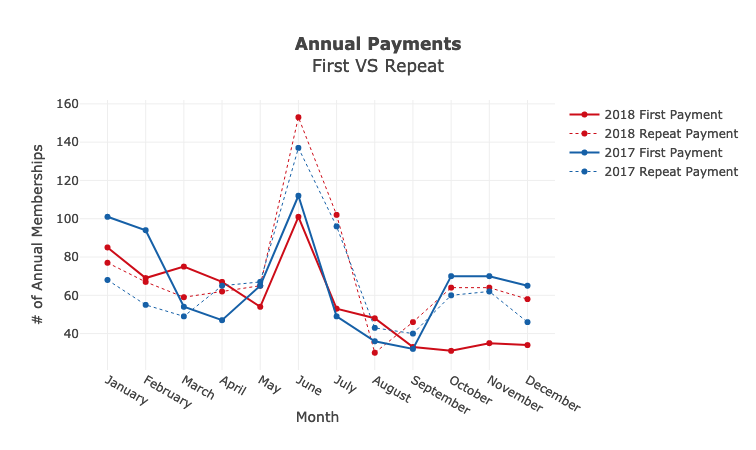

In [124]:
trace0 = go.Scatter(
    x = month,
    y = annual_first_count_18,
    name = '2018 First Payment',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 2)
)
trace1 = go.Scatter(
    x = month,
    y = annual_not_first_count_18,
    name = '2018 Repeat Payment',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1,
        dash = 'dot')
)
trace2 = go.Scatter(
    x = month,
    y = annual_first_count_17,
    name = '2017 First Payment',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 2,
        )
)
trace3 = go.Scatter(
    x = month,
    y = annual_not_first_count_17,
    name = '2017 Repeat Payment',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 1,
        dash = 'dot')
)

data = [trace0, trace1, trace2, trace3]

# Edit the layout
layout = dict(title = '<b>Annual Payments</b><br>First VS Repeat',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = '# of Annual Memberships'),
              )

fig = dict(data=data, layout=layout)
po.iplot(fig, filename='Membership_Sum_Per_Month_Total')


In [ ]:
#For how many users was the first_payment the last_payment?


#How many memberships during anniversary week were refunded?

In [47]:
#Find Stats for just Anniversary Week
anniversary_week = df_18.loc[(df_18['paid_date'] >= '2018-06-17') & (df_18['paid_date'] < '2018-06-27')]

anniversary_week_count = anniversary_week.amount.count()
anniversary_week_sum = anniversary_week.amount.sum()

anniversary_annual_count = anniversary_week.amount[anniversary_week.subscription_term_length == 12].count()
anniversary_annual_sum = anniversary_week.amount[anniversary_week.subscription_term_length == 12].sum()

anniversary_monthly_count = anniversary_week.amount[anniversary_week.subscription_term_length == 1].count()
anniversary_monthly_sum = anniversary_week.amount[anniversary_week.subscription_term_length == 1].sum()


print('Anniversary Week Stats:\n'
     + 'Total Memberships: ' + str(anniversary_week_count) + '\n'
     + 'Membership Revenue: ' + str('${:,.2f}'.format(anniversary_week_sum)) + '\n'
     + '\n' 
     + 'Total Annual Memberships: ' + str(anniversary_annual_count) + '\n'
     + 'Total Annual Revenue: ' + str('${:,.2f}'.format(anniversary_annual_sum)) + '\n'
     + '\n'
     + 'Total Monthly Memberships: ' + str(anniversary_monthly_count) + '\n'
     + 'Total Monthly Revenue: ' + str('${:,.2f}'.format(anniversary_monthly_sum)) + '\n')

print(anniversary_week.head())

Anniversary Week Stats:
Total Memberships: 605
Membership Revenue: $90,639.65

Total Annual Memberships: 177
Total Annual Revenue: $69,530.00

Total Monthly Memberships: 428
Total Monthly Revenue: $21,109.65

                paid_date  amount    created_at  subscription_term_length  \
11112 2018-06-17 00:22:00    70.0  6/17/18 0:22                         1   
11113 2018-06-17 00:22:00  1494.0  6/17/18 0:22                        12   
11114 2018-06-17 00:22:00   140.0  6/17/18 0:22                        12   
11115 2018-06-17 00:22:00    40.0  6/17/18 0:22                         1   
11116 2018-06-17 00:22:00    70.0  6/17/18 0:22                         1   

       is_first_payment is_last_payment  membership_level  
11112             False             NaN               3.0  
11113             False            True               4.0  
11114             False             NaN               1.0  
11115             False             NaN               2.0  
11116             False     

In [59]:
#Group By Day
anniversary_days = anniversary_week.set_index('paid_date').groupby(pd.Grouper(freq='D')).sum().copy().reset_index()
date_amount = df_18.set_index('paid_date').groupby(pd.Grouper(freq='D')).count().reset_index()
date_amount = date_amount[['paid_date','amount']]
print(anniversary_days)

   paid_date    amount  subscription_term_length  is_first_payment  \
0 2018-06-17   4277.00                       107              13.0   
1 2018-06-18   6599.00                       228              19.0   
2 2018-06-19   7778.95                       175              19.0   
3 2018-06-20   7644.00                       230              18.0   
4 2018-06-21  16881.90                       426              24.0   
5 2018-06-22  14633.90                       421              28.0   
6 2018-06-23  11162.00                       356              26.0   
7 2018-06-24   7563.95                       266              13.0   
8 2018-06-25   9146.95                       191              19.0   
9 2018-06-26   4952.00                       152              20.0   

   membership_level  
0              77.0  
1             133.0  
2             114.0  
3             122.0  
4             171.0  
5             190.0  
6             149.0  
7             118.0  
8             127.0  
9        

In [58]:

import plotly_express as px
px.scatter(anniversary_days, x='paid_date', y='amount')
